In [1]:
# Run this first!!!
from IPython.display import display, HTML

from __future__ import division
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../common')
import common_probs
from sampling_misc import sample_total_states
from sampler import DepthSampler

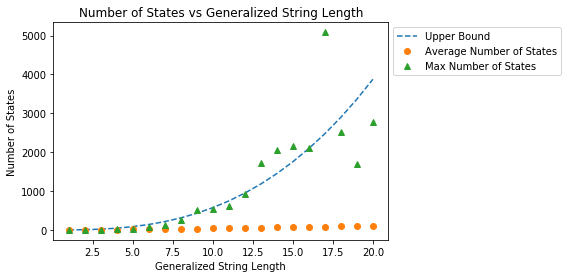

In [2]:
LENGTHS = range(1, 21)
PROBS = [0.5 for _ in xrange(4)]
NUM_SAMPLES = 10000

# Find the high prob upper bound
c_2 = common_probs.get_c2(4)
linear_pt = np.log(2) / np.log(1 / c_2)
bound = lambda length: length ** (linear_pt)

# Sample the total number of states
avg_states, max_states = [], []
for length in LENGTHS:
    avg, mx = sample_total_states(NUM_SAMPLES, PROBS, length)
    avg_states.append(avg)
    max_states.append(mx)

# Make a plot
plt.plot(LENGTHS, [bound(l) for l in LENGTHS], '--', label='Upper Bound')
plt.plot(LENGTHS, avg_states, 'o', label='Average Number of States')
plt.plot(LENGTHS, max_states, '^', label='Max Number of States')
plt.title('Number of States vs Generalized String Length')
plt.xlabel('Generalized String Length')
plt.ylabel('Number of States')
plt.legend(bbox_to_anchor=(1,1))
plt.show()


/home/ian/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


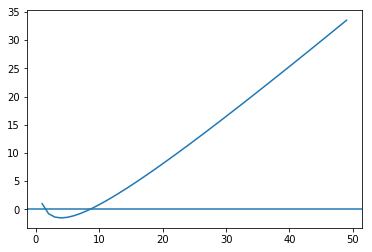

In [11]:
# How many depths will grow linearly?
c_2 = common_probs.get_c2(4)
f = lambda x: x - np.log(x) / np.log(1 / c_2)
depths = range(50)
plt.plot(depths, [f(d) for d in depths])
plt.axhline(0)
plt.show()

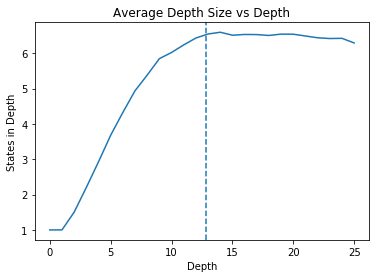

In [33]:
PROBS = [0.5 for _ in range(4)]
NUM_SAMPLES = 10000
LENGTH = 25

# Find place where starts being linear.
c_2 = common_probs.get_c2(4)
lin_pt = np.log(LENGTH) / np.log(1 / c_2)

# Sample points.
ds = DepthSampler(PROBS, LENGTH)
df = ds.draw_samples(NUM_SAMPLES, ['states'])
avg = df.groupby('depth')['states'].mean()
# mx = df.groupby('depth')['states'].max()

# Make plot of this
lengths = range(LENGTH + 1)
plt.plot(lengths, avg, label='Average')
# plt.plot(lengths, mx, label='Max')
plt.axvline(lin_pt, ls='--')
plt.title('Average Depth Size vs Depth')
plt.ylabel('States in Depth')
plt.xlabel('Depth')
plt.show()